In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
df =pd.read_csv('Salary_Data.csv')
display(df.shape)
df.head()

(30, 3)

,YearsExperience,Age,Salary
0,1.1,21.0,39343
1,1.3,21.5,46205
2,1.5,21.7,37731
3,2.0,22.0,43525
4,2.2,22.2,39891


In [ ]:
x=df.iloc[:,0:2] # to be 2 dim array
y=df.iloc[:,2]
x[0:5]

,YearsExperience,Age
0,1.1,21.0
1,1.3,21.5
2,1.5,21.7
3,2.0,22.0
4,2.2,22.2


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)
x_train


,YearsExperience,Age
5,2.9,23.0
13,4.1,24.0
11,4.0,24.0
22,7.9,31.0
1,1.3,21.5
2,1.5,21.7
25,9.0,34.0
3,2.0,22.0
21,7.1,30.0
26,9.5,35.0


In [ ]:
#standard scalling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)
y_pred.round(2)


array([118528.34,  68703.12, 101994.06,  75432.87,  56013.33,  59277.63,
       124455.53, 106896.32,  61751.  ,  39869.71,  48314.75,  72068.  ])

In [ ]:
test_score=lr.score(x_test,y_test)
print(test_score)

0.9536450766301301


In [ ]:
from sklearn.metrics import r2_score
test_score=r2_score(y_test,y_pred)
print(test_score)

0.9536450766301301


In [ ]:
lr.score(x_train,y_train)

0.964188582610245

In [ ]:
a=lr.coef_
a

array([47146.67462238, 38609.11727422])

In [ ]:
b=lr.intercept_
b

42064.61172800783

In [ ]:
y_pred1=a.dot(x_test.T)+b
y_pred1.round(2)

array([118528.34,  68703.12, 101994.06,  75432.87,  56013.33,  59277.63,
       124455.53, 106896.32,  61751.  ,  39869.71,  48314.75,  72068.  ])

In [ ]:
sum((y_pred==y_pred1))

12

# **polynomial example**

In [ ]:
df =pd.read_csv('Position_Salaries.csv')
display(df.shape)
df.head()

(10, 3)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [ ]:
x=df.iloc[:,1:2]
y=df.iloc[:,2]
x[0:5]

#split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)
x_train

,Level
7,8
2,3
9,10
4,5
3,4
6,7


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)
x_poly_train=poly.fit_transform(x_train)
x_poly_test=poly.transform(x_test)

In [ ]:
lr=LinearRegression()
lr.fit(x_poly_train,y_train)


LinearRegression()

In [ ]:
y_pred=lr.predict(x_poly_test)
y_pred.round(2)

array([642363.64, 259272.73,  86909.09, 465393.94])

-0.7702771336829153

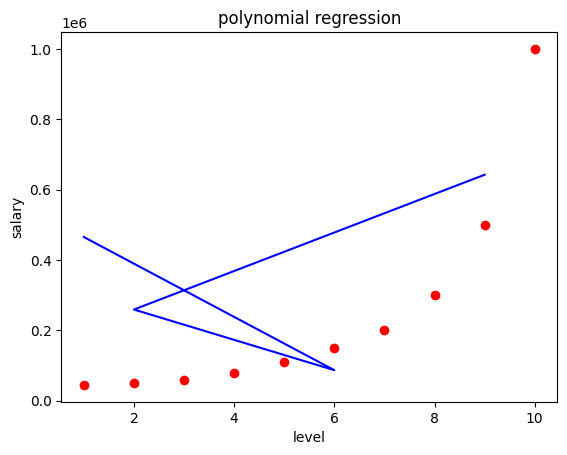

In [ ]:
plt.scatter(x,y,color='red')
plt.plot(x_test,lr.predict(x_poly_test),color='blue')
plt.title('polynomial regression')
plt.xlabel('level')
plt.ylabel('salary')
plt.show()